In [7]:
import datetime
import time
import random
import requests
import json
import bson
import gzip
import os

LOCAL = 'http://localhost:8000/'
REMOTE = 'https://api-recintos.herokuapp.com/'
HOME = LOCAL
CARGA = 100

In [8]:
letras = 'ABCDEFGHIJKLMNOPQRSTUVXZ'
numeros = ''.join([str(i) for i in range(10)])
textos = 'ABCDEFGHIJKLMNOPQRSTUVXZ          abcdefghijklmnopqrstuvwxyz'
def random_str(num=3, fila=letras):
    result = ''
    for i in range(num):
        result += random.choice(fila)
    return result

   

placas = [random_str(3) + random_str(5, numeros) for i in range(100)]
reboques = [random_str(3) + random_str(5, numeros) for i in range(200)]
conteineres = [random_str(4) + random_str(7, numeros) for i in range(200)]
operadores = [random_str(11) for i in range(10)]
motoristas = [random_str(11) for i in range(50)]
textos = [random_str(random.randint(10, 20), textos) for i in range(50)]

In [9]:
pesagens = []
for r in range(CARGA):
    data = datetime.datetime.now().isoformat()
    operador = random.choice(operadores)
    conteiner = random.choice(conteineres)
    tara = random.randint(9000, 12000)
    pesobrutodeclarado = random.randint(3000, 15000)
    pesobalanca = tara + random.randint(-2000, 2000)
    placa = random.choice(placas)
    reboque = random.choice(reboques)
    texto = random.choice(textos)
    pesagem = \
    {'IDEvento': r,
     'capturaautomatica': True,
     'conteiner': random.choice(conteineres),
     'dataevento': data,
     'dataregistro': data,
     'retificador': False,
     'documentotransporte': texto,
     'operadorevento': operador,
     'operadorregistro': operador,
     'pesobalanca': pesobalanca,
     'pesobrutodeclarado': pesobrutodeclarado,
     'placa': placa,
     'placasemireboque': reboque,
     'taraconjunto': tara,
     'tipodocumentotransporte': 'CE'}
    pesagens.append(pesagem)


In [10]:
pesagens[:5]

[{'IDEvento': 0,
  'capturaautomatica': True,
  'conteiner': 'CGMB2659516',
  'dataevento': '2019-05-28T16:50:02.450383',
  'dataregistro': '2019-05-28T16:50:02.450383',
  'documentotransporte': 'I  acfD je',
  'operadorevento': 'ZHOBJLHQRHO',
  'operadorregistro': 'ZHOBJLHQRHO',
  'pesobalanca': 10936,
  'pesobrutodeclarado': 3328,
  'placa': 'SPB86202',
  'placasemireboque': 'ALX40286',
  'retificador': False,
  'taraconjunto': 10121,
  'tipodocumentotransporte': 'CE'},
 {'IDEvento': 1,
  'capturaautomatica': True,
  'conteiner': 'PRZK9858186',
  'dataevento': '2019-05-28T16:50:02.450497',
  'dataregistro': '2019-05-28T16:50:02.450497',
  'documentotransporte': 'ScQP s  GCS Q',
  'operadorevento': 'IBBOSGPFVOL',
  'operadorregistro': 'IBBOSGPFVOL',
  'pesobalanca': 9063,
  'pesobrutodeclarado': 6158,
  'placa': 'CZB55249',
  'placasemireboque': 'IQA81890',
  'retificador': False,
  'taraconjunto': 10913,
  'tipodocumentotransporte': 'CE'},
 {'IDEvento': 2,
  'capturaautomatica': True

In [11]:
s0 = time.time()
for pesagem in pesagens[:CARGA // 2]:
    rv = requests.post(HOME + 'pesagemmaritimo',
                   json=pesagem)
    print(rv.status_code)
    print(rv.text)
s1 = time.time()

201
-4807489307495486138

201
-6228561499361064826

201
7426620730026009243

201
-2767748308726150703

201
-7136469627453569988

201
-8350075924657868454

201
-4840651638786027248

201
-81429757355430853

201
6255691205571645652

201
4295362845430146847

201
-8369866394895155696

201
-4079511282884041818

201
6062111430515596486

201
6020080090005346748

201
-8010480428397194535

201
-5323855257570113335

201
6660311641866149566

201
-3780382856603995062

201
2653691088276545504

201
3180228684910671215

201
4512038616272786746

201
-5219038155999967029

201
-2411070046082235245

201
-8374829344105631587

201
8455714324230576403

201
-577741482077584098

201
-1124818315885005114

201
-4412879070217149853

201
-1997252059335425815

201
4801324594147330753

201
721998331194496635

201
6532358994265307530

201
-2846192216326986598

201
-1057082718614161142

201
3181239000768600294

201
-4353674334637977275

201
7598043162914119458

201
2726870008277441136

201
-5789482176239483460

201
48

In [12]:
print('Gravados %d registros em %d segundos' % (CARGA // 2, s1-s0) )
print((s1 - s0) / (CARGA // 2))

Gravados 50 registros em 1 segundos
0.023977699279785155


In [13]:
s0 = time.time()
lista_eventos = []
for IDEvento in range(CARGA):
    rv = requests.get(HOME + 'pesagemmaritimo/' + str(IDEvento))
    if rv.status_code == 200:
        lista_eventos.append((rv.status_code, 
                              rv.json()))
#    print(rv.json())
s1 = time.time()

In [14]:
print('Consultados %d registros em %s segundos' % (len(lista_eventos), s1-s0))
print((s1 - s0) / len(lista_eventos))

Consultados 50 registros em 0.3805074691772461 segundos
0.007610149383544922


In [15]:
lista_eventos[:10]

[(200,
  {'ID': 1,
   'IDEvento': 0,
   'capturaautomatica': True,
   'dataevento': '2019-05-28T16:50:02.450383Z',
   'dataregistro': '2019-05-28T16:50:02.450383Z',
   'documentotransporte': 'I  acfD je',
   'hash': -4807489307495486138,
   'numero': None,
   'operadorevento': 'ZHOBJLHQRHO',
   'operadorregistro': 'ZHOBJLHQRHO',
   'pesobalanca': 10936,
   'pesobrutodeclarado': 3328,
   'placa': 'SPB86202',
   'placasemireboque': 'ALX40286',
   'recinto': '00001',
   'request_IP': '127.0.0.1',
   'retificador': False,
   'taraconjunto': 10121,
   'time_created': '2019-05-28T19:50:04Z',
   'tipodocumentotransporte': 'CE'}),
 (200,
  {'ID': 2,
   'IDEvento': 1,
   'capturaautomatica': True,
   'dataevento': '2019-05-28T16:50:02.450497Z',
   'dataregistro': '2019-05-28T16:50:02.450497Z',
   'documentotransporte': 'ScQP s  GCS Q',
   'hash': -6228561499361064826,
   'numero': None,
   'operadorevento': 'IBBOSGPFVOL',
   'operadorregistro': 'IBBOSGPFVOL',
   'pesobalanca': 9063,
   'pesobru

In [16]:
json_pesagens = {'PesagemMaritimo': pesagens[CARGA // 2:]}

with open('test.json', 'w', encoding='utf-8', newline='') as json_out:
    json.dump(json_pesagens, json_out)

In [17]:
with open('test.json.gzip', 'wb') as json_out:
    payload = json.dumps(json_pesagens)
    payload = gzip.compress(payload.encode('utf-8'))
    json_out.write(payload)

In [18]:
def tofile(lista, newfilename, zipped=False):
    """Salva instância em arquivo (padrão BSON)."""
    with open(newfilename, 'wb') as f:
        payload = bson.BSON.encode(lista)
        if zipped:
            payload = gzip.compress(payload)
        f.write(payload)


In [19]:
tofile(json_pesagens, 'test.bson')

In [20]:
tofile(json_pesagens, 'test.bson.gzip', zipped=True)

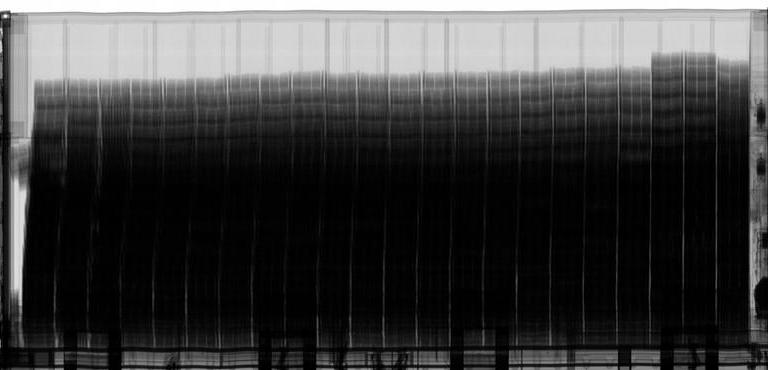

In [21]:
from IPython import display
images = os.listdir('images')
data = {'IDEvento': 0,
       'tipoevento': 'InspecaonaoInvasiva',
       'campoevento': 'nomearquivo'}
image = open(os.path.join('images', images[0]), 'rb').read()
display.Image(image)

In [22]:
files = {'file': (images[0], image, 'image/jpeg')}
headers = {}
# headers['Content-Type'] = 'image/jpeg'
r = requests.post(HOME + 'upload_file',
                  data=data,
                  files=files,
                  headers=headers)
print(r.status_code)
print(r.text)

404
Evento não encontrado.


In [23]:
r = requests.get(HOME + 'get_file',
                  data=data,
                  headers=headers)
print(r.status_code)

404


In [24]:
open('test.jpg', 'wb').write(r.content)

23

In [25]:
from PIL import Image
image = Image.open('test.jpg')

OSError: cannot identify image file 'test.jpg'

In [26]:
image

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01r\x03\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4

In [27]:
s0 = time.time()
query = {'IDEvento': 0,
       'tipoevento': 'PesagemMaritimo'}
r = requests.get(HOME + 'get_eventos_novos',
                  data=query,
                  headers=headers)
s1 = time.time()
print(r.status_code)
print(r.text[:1000])

200
[
  {
    "ID": 2, 
    "IDEvento": 1, 
    "capturaautomatica": true, 
    "dataevento": "2019-05-28T16:50:02.450497Z", 
    "dataregistro": "2019-05-28T16:50:02.450497Z", 
    "documentotransporte": "ScQP s  GCS Q", 
    "hash": -6228561499361064826, 
    "numero": null, 
    "operadorevento": "IBBOSGPFVOL", 
    "operadorregistro": "IBBOSGPFVOL", 
    "pesobalanca": 9063, 
    "pesobrutodeclarado": 6158, 
    "placa": "CZB55249", 
    "placasemireboque": "IQA81890", 
    "recinto": "00001", 
    "request_IP": "127.0.0.1", 
    "retificador": false, 
    "taraconjunto": 10913, 
    "time_created": "2019-05-28T19:50:04Z", 
    "tipodocumentotransporte": "CE"
  }, 
  {
    "ID": 3, 
    "IDEvento": 2, 
    "capturaautomatica": true, 
    "dataevento": "2019-05-28T16:50:02.450554Z", 
    "dataregistro": "2019-05-28T16:50:02.450554Z", 
    "documentotransporte": "OdJJJZNBcjXlBRzGHuS", 
    "hash": 7426620730026009243, 
    "numero": null, 
    "operadorevento": "IERCPJDGRUS", 
    "o

In [28]:
lista_eventos = json.loads(r.text)

In [29]:
print('Consultados %d registros em %s segundos' % (len(lista_eventos), s1-s0))
print((s1 - s0) / len(lista_eventos))

Consultados 49 registros em 0.014060497283935547 segundos
0.00028694892416194996


In [30]:
lista_eventos[:10]

[{'ID': 2,
  'IDEvento': 1,
  'capturaautomatica': True,
  'dataevento': '2019-05-28T16:50:02.450497Z',
  'dataregistro': '2019-05-28T16:50:02.450497Z',
  'documentotransporte': 'ScQP s  GCS Q',
  'hash': -6228561499361064826,
  'numero': None,
  'operadorevento': 'IBBOSGPFVOL',
  'operadorregistro': 'IBBOSGPFVOL',
  'pesobalanca': 9063,
  'pesobrutodeclarado': 6158,
  'placa': 'CZB55249',
  'placasemireboque': 'IQA81890',
  'recinto': '00001',
  'request_IP': '127.0.0.1',
  'retificador': False,
  'taraconjunto': 10913,
  'time_created': '2019-05-28T19:50:04Z',
  'tipodocumentotransporte': 'CE'},
 {'ID': 3,
  'IDEvento': 2,
  'capturaautomatica': True,
  'dataevento': '2019-05-28T16:50:02.450554Z',
  'dataregistro': '2019-05-28T16:50:02.450554Z',
  'documentotransporte': 'OdJJJZNBcjXlBRzGHuS',
  'hash': 7426620730026009243,
  'numero': None,
  'operadorevento': 'IERCPJDGRUS',
  'operadorregistro': 'IERCPJDGRUS',
  'pesobalanca': 11539,
  'pesobrutodeclarado': 7916,
  'placa': 'KPH7378

In [31]:
s0 = time.time()
files = {'file': ('test.json', open('test.json', 'r'), 'text/json')}
headers = {}
# headers['Content-Type'] = 'image/jpeg'
r = requests.post(HOME + 'set_eventos_novos',
                  data=data,
                  files=files,
                  headers=headers)
s1 = time.time()
print(r.status_code)
print(r.text)


201
[
  {
    "IDEvento": 50, 
    "hash": 6901618861254910335
  }, 
  {
    "IDEvento": 51, 
    "hash": 5541878240847989619
  }, 
  {
    "IDEvento": 52, 
    "hash": 6831252833105351224
  }, 
  {
    "IDEvento": 53, 
    "hash": -3757962496483993345
  }, 
  {
    "IDEvento": 54, 
    "hash": 1354141284648884911
  }, 
  {
    "IDEvento": 55, 
    "hash": -556991403825226245
  }, 
  {
    "IDEvento": 56, 
    "hash": 8028122056083013573
  }, 
  {
    "IDEvento": 57, 
    "hash": 5449133351729161668
  }, 
  {
    "IDEvento": 58, 
    "hash": 4268843537034976252
  }, 
  {
    "IDEvento": 59, 
    "hash": -6718992851902010518
  }, 
  {
    "IDEvento": 60, 
    "hash": -6361486284902505758
  }, 
  {
    "IDEvento": 61, 
    "hash": 4919737457380698160
  }, 
  {
    "IDEvento": 62, 
    "hash": -1639249394911906483
  }, 
  {
    "IDEvento": 63, 
    "hash": 5671522007877914772
  }, 
  {
    "IDEvento": 64, 
    "hash": -1461659623945634662
  }, 
  {
    "IDEvento": 65, 
    "hash": 7495263

In [32]:
print('Gravados %d registros em %s segundos' % (CARGA // 2, s1-s0))
print((s1 - s0) / (CARGA // 2))

Gravados 50 registros em 0.1287364959716797 segundos
0.002574729919433594


In [33]:
s0 = time.time()
query = {'recinto': '00001',
         'datainicial': '2019-01-01',
         'datafinal': datetime.datetime.now().isoformat(),
         'altura': 0}
r = requests.post(HOME + 'posicaoconteiner/list',
                  json=query,
                  headers=headers)
s1 = time.time()
print(r.status_code)
print(r.text[:1000])

404
"Sem eventos posicaoconteiner entre datas 2019-01-01 a 2019-05-28T16:51:15.223146."

